<a href="https://colab.research.google.com/github/conpop9/Stonks/blob/main/Doge_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:

import gym
import gym_anytrading
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Importing Doge Coin Data

In [14]:
df = pd.read_csv('doge.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/21,0.330407,0.432618,0.297074,0.397741,13850000000
1,03/11/21,0.474719,0.477866,0.217528,0.330353,19280000000
2,03/10/21,0.486444,0.512529,0.468941,0.474714,4750000000
3,03/09/21,0.513062,0.514821,0.457331,0.486366,6840000000
4,03/08/21,0.507796,0.547205,0.449635,0.513023,8260000000


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [17]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,0.330407,0.432618,0.297074,0.397741,13850000000
2021-03-11,0.474719,0.477866,0.217528,0.330353,19280000000
2021-03-10,0.486444,0.512529,0.468941,0.474714,4750000000
2021-03-09,0.513062,0.514821,0.457331,0.486366,6840000000
2021-03-08,0.507796,0.547205,0.449635,0.513023,8260000000


In [18]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 2.6450e+02,  0.0000e+00],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,

# 2. Build Environment

In [19]:
env.action_space

Discrete(2)

info {'total_reward': -0.33654699999999993, 'total_profit': 0.09982458467218713, 'position': 0}


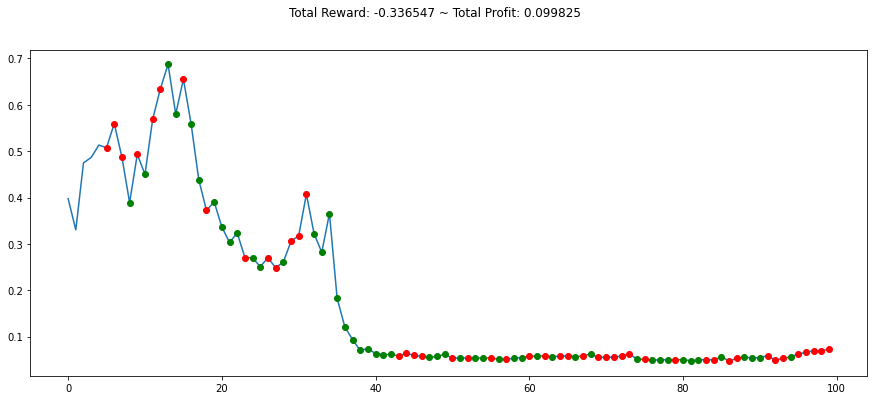

In [20]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [21]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)

# 4. Evaluation

In [23]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.6136947788074543, 'position': 1}


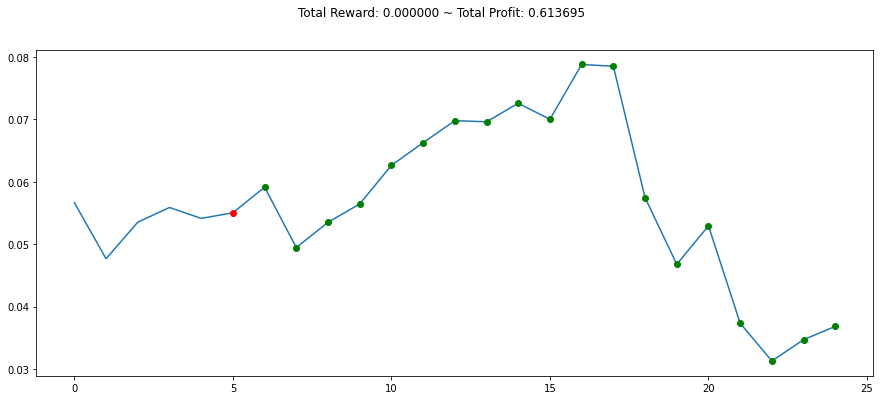

In [24]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()